In [3]:
import pandas as pd 
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.utils.extmath import density



In [4]:
true_news = pd.read_csv("True.csv")
fake_news = pd.read_csv("Fake.csv")
true_news["news"] = "REAL"
fake_news["news"] = "FAKE"



In [5]:
news = pd.concat((true_news, fake_news))
news.head()

,title,text,subject,date,news
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",REAL
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",REAL
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",REAL
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",REAL
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",REAL


In [6]:
check = news[["news"]]
# print(news.head())
check.head()

,news
0,REAL
1,REAL
2,REAL
3,REAL
4,REAL


In [7]:
news.drop("news", inplace=True,axis=1)
news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
news.isnull().any()

title      False
text       False
subject    False
date       False
dtype: bool

In [9]:
x_train, x_test, y_train, y_test = train_test_split(news["text"], check, test_size=0.2)


In [10]:
tfidf_vector = TfidfVectorizer(stop_words="english", max_df=0.7)

tfidf_train = tfidf_vector.fit_transform(x_train)
tfidf_test = tfidf_vector.transform(x_test)

tfidf_train

<35918x111237 sparse matrix of type '<class 'numpy.float64'>'
	with 5469963 stored elements in Compressed Sparse Row format>

In [11]:
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)



/home/vishwa/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


PassiveAggressiveClassifier(max_iter=50)

In [12]:
y_pred = pac.predict(tfidf_test)


In [13]:
score = accuracy_score(y_test, y_pred)
score

0.9952115812917595

In [14]:
a = confusion_matrix(y_test, y_pred)
a

array([[4653,   22],
       [  21, 4284]])

In [15]:
tfidf_train

<35918x111237 sparse matrix of type '<class 'numpy.float64'>'
	with 5469963 stored elements in Compressed Sparse Row format>

In [46]:
# k_range = range(1,10)
score = {}
score_list =[]
for k in range(1,4):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(tfidf_train, y_train)
    y_pred1 = knn.predict(tfidf_test)
    score[k] = accuracy_score(y_test, y_pred1)
    score_list.append(accuracy_score(y_test, y_pred1))

/home/vishwa/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/vishwa/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/vishwa/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Text(0, 0.5, 'accuracy of model')

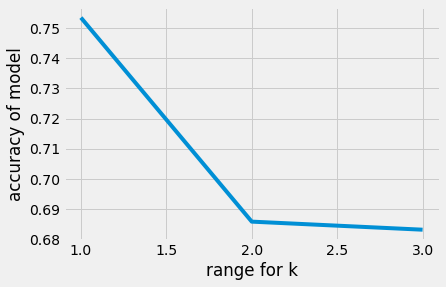

In [47]:
plt.plot(range(1,4), score_list)
plt.xlabel("range for k")
plt.ylabel("accuracy of model")

In [18]:
clf = DecisionTreeClassifier()

clf.fit(tfidf_train, y_train)


DecisionTreeClassifier()

In [19]:
y_pred2 = clf.predict(tfidf_test)

a= accuracy_score(y_test,y_pred2)


In [20]:
print(a)
true_news["news"] = 1
fake_news["news"] = 0
news1 = pd.concat((true_news, fake_news))
news1.head()



0.995879732739421


,title,text,subject,date,news
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


<AxesSubplot:xlabel='subject', ylabel='count'>

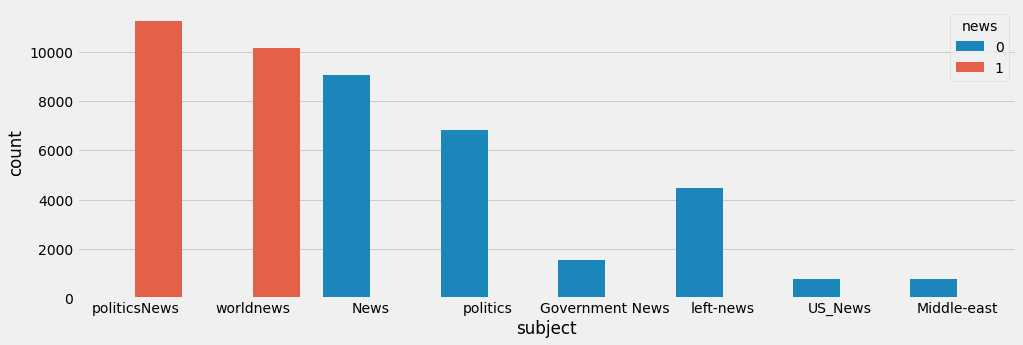

In [21]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,5))
sns.countplot(x="subject", data=news1, hue="news")

In [25]:
print(f"Dimensionality (number of features) : {pac.coef_.shape[1]}")
print("Density (i.e., fraction of non-zero elements): {:.3f}".format(density(pac.coef_)))
print(pac.coef_)

Dimensionality (number of features) : 111237
Density (i.e., fraction of non-zero elements): 0.512
[[-0.7792937  -0.52832827  0.25869381 ...  0.          0.
   0.00844072]]


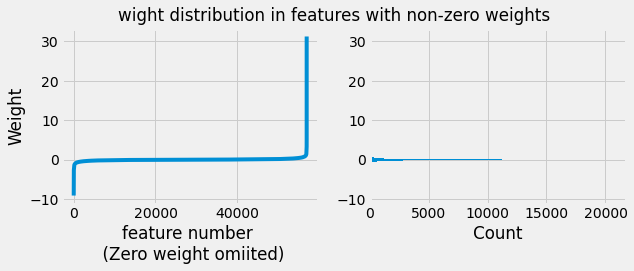

In [38]:
weights_nonzero = pac.coef_[pac.coef_ !=0]
featured_sorter_nonzero = np.argsort(weights_nonzero)
weights_nonzero_sorted = weights_nonzero[featured_sorter_nonzero]

fig, axs = plt.subplots(1,2, figsize=(9,3))

sns.lineplot(data=weights_nonzero_sorted, ax=axs[0])
axs[0].set_ylabel("Weight")
axs[0].set_xlabel("feature number \n (Zero weight omiited)")

axs[1].hist(weights_nonzero_sorted,orientation='horizontal', bins=500,)
axs[1].set_xlabel('Count')

fig.suptitle("wight distribution in features with non-zero weights")
plt.show()

In [45]:
tokens = tfidf_vector.get_feature_names()
tokens_nonzero = np.array(tokens)[pac.coef_[0] !=0]
tokens_nonzero_sorted = np.array(tokens_nonzero)[featured_sorter_nonzero]

num_tokens = 10
fake_indicator_tokens = tokens_nonzero_sorted[:num_tokens]
real_indicator_tokens = np.flip(tokens_nonzero_sorted[-num_tokens:])

fake_indicator = pd.DataFrame({
    "Token": fake_indicator_tokens,
    "weight": weights_nonzero_sorted[:num_tokens]
})

real_indicator = pd.DataFrame({
    'Token': real_indicator_tokens,
    'Weight': np.flip(weights_nonzero_sorted[-num_tokens:])
})

print('The top {} tokens likely to appear in fake news were the following: \n'.format(num_tokens))
display(fake_indicator)

print('\n\n...and the top {} tokens likely to appear in real news were the following: \n'.format(num_tokens))
display(real_indicator)


The top 10 tokens likely to appear in fake news were the following: 



,Token,weight
0,read,-9.087780
1,image,-7.593828
2,featured,-7.591413
3,gop,-5.975311
4,getty,-5.470318
5,just,-5.356630
6,com,-4.755581
7,hillary,-4.296690
8,watch,-4.184945
9,sen,-4.133862




...and the top 10 tokens likely to appear in real news were the following: 



,Token,Weight
0,reuters,31.246384
1,nov,5.318484
2,washington,4.783676
3,republican,4.147672
4,wednesday,4.072878
5,thursday,4.070396
6,tuesday,3.829347
7,comment,3.312708
8,saying,3.292405
9,statement,3.218584
